In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sessions = np.arange(25, 77) # with Session 76 included 
data = []

for session in sessions:
    directory = "./TXT/Session " + str(session) + " - " + str(1945 + session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename))
        if filename[0] == ".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945 + session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8598,76,2021,BTN,"Statement by His Excellency Dr Lotay Tshering,..."
8599,76,2021,SRB,"Mr. President,\nMr. Secretary General,\nExcell..."
8600,76,2021,SYR,Statement by\n\nH.E. Fayssal Mekdad\nMinister ...
8601,76,2021,IDN,Please Check Against Delivery\n\nSTATEMENT\n\n...
8602,76,2021,DNK,"The General Debate, 76th United Nations Genera..."


In [3]:
df_codes = pd.read_csv('UNSD — Methodology.csv', sep = ";")
df_codes.head()

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,12,DZ,DZA,NaN,NaN,NaN
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN


In [4]:
df0 = pd.merge(df_speech, df_codes)
df0.tail()

,Session,Year,ISO-alpha3 Code,Speech,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
8501,71,2016,SSD,I bring to the General Assembly greetings from...,1,World,2.0,Africa,202.0,Sub-Saharan Africa,14.0,Eastern Africa,South Sudan,728,SS,x,x,NaN
8502,72,2017,SSD,I am honoured to deliver this statement on beh...,1,World,2.0,Africa,202.0,Sub-Saharan Africa,14.0,Eastern Africa,South Sudan,728,SS,x,x,NaN
8503,73,2018,SSD,It is my great honour to deliver this statemen...,1,World,2.0,Africa,202.0,Sub-Saharan Africa,14.0,Eastern Africa,South Sudan,728,SS,x,x,NaN
8504,74,2019,SSD,It is my honour to address the General Assembl...,1,World,2.0,Africa,202.0,Sub-Saharan Africa,14.0,Eastern Africa,South Sudan,728,SS,x,x,NaN
8505,76,2021,SSD,REPUBLIC OF SOUTH SUDAN\nREVITALIZED TRANSITIO...,1,World,2.0,Africa,202.0,Sub-Saharan Africa,14.0,Eastern Africa,South Sudan,728,SS,x,x,NaN


In [5]:
df_COFOG_GDP = pd.read_csv('GDP_gov_10a_exp__custom_3466255_linear.csv', sep = ",")
df_COFOG_GDP.tail()

,DATAFLOW,LAST UPDATE,freq,unit,sector,cofog99,na_item,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
829,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2016,0.7,NaN
830,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2017,0.8,NaN
831,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2018,0.8,NaN
832,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2019,0.8,NaN
833,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2020,0.9,NaN


In [6]:
df = pd.merge(df_COFOG_GDP, df0, left_on = ["geo", "TIME_PERIOD"], right_on = ["ISO-alpha2 Code", "Year"])
df

,DATAFLOW,LAST UPDATE,freq,unit,sector,cofog99,na_item,geo,TIME_PERIOD,OBS_VALUE,...,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS)
0,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,AT,1995,1.2,...,155.0,Western Europe,NaN,NaN,Austria,40,AT,NaN,NaN,NaN
1,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,AT,1996,1.3,...,155.0,Western Europe,NaN,NaN,Austria,40,AT,NaN,NaN,NaN
2,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,AT,1997,0.4,...,155.0,Western Europe,NaN,NaN,Austria,40,AT,NaN,NaN,NaN
3,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,AT,1998,0.4,...,155.0,Western Europe,NaN,NaN,Austria,40,AT,NaN,NaN,NaN
4,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,AT,1999,0.5,...,155.0,Western Europe,NaN,NaN,Austria,40,AT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2016,0.7,...,151.0,Eastern Europe,NaN,NaN,Slovakia,703,SK,NaN,NaN,NaN
744,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2017,0.8,...,151.0,Eastern Europe,NaN,NaN,Slovakia,703,SK,NaN,NaN,NaN
745,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2018,0.8,...,151.0,Eastern Europe,NaN,NaN,Slovakia,703,SK,NaN,NaN,NaN
746,ESTAT:GOV_10A_EXP(1.0),21/07/22 23:00:00,A,PC_GDP,S13,GF05,TE,SK,2019,0.8,...,151.0,Eastern Europe,NaN,NaN,Slovakia,703,SK,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 0 to 747
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   DATAFLOW                                 748 non-null    object 
 1   LAST UPDATE                              748 non-null    object 
 2   freq                                     748 non-null    object 
 3   unit                                     748 non-null    object 
 4   sector                                   748 non-null    object 
 5   cofog99                                  748 non-null    object 
 6   na_item                                  748 non-null    object 
 7   geo                                      748 non-null    object 
 8   TIME_PERIOD                              748 non-null    int64  
 9   OBS_VALUE                                748 non-null    float64
 10  OBS_FLAG                                 7 non-nul

In [8]:
# drop unnecessary columns 
df.drop(["geo", "TIME_PERIOD", 'DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'sector', 'cofog99', 'na_item', 'Intermediate Region Code', 'Intermediate Region Name', 'Least Developed Countries (LDC)', 'Land Locked Developing Countries (LLDC)', 'Small Island Developing States (SIDS)', "OBS_FLAG"], axis=1, inplace=True)
df.head()

,OBS_VALUE,Session,Year,ISO-alpha3 Code,Speech,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Country or Area,M49 Code,ISO-alpha2 Code
0,1.2,50,1995,AUT,It is with great\npleasure that I congratulate...,1,World,150.0,Europe,155.0,Western Europe,Austria,40,AT
1,1.3,51,1996,AUT,"﻿We are glad to see the\nGeneral Assembly, the...",1,World,150.0,Europe,155.0,Western Europe,Austria,40,AT
2,0.4,52,1997,AUT,"﻿Let me express my\npleasure at seeing you, Si...",1,World,150.0,Europe,155.0,Western Europe,Austria,40,AT
3,0.4,53,1998,AUT,I have the honour and\nprivilege to speak on b...,1,World,150.0,Europe,155.0,Western Europe,Austria,40,AT
4,0.5,54,1999,AUT,"Mr. President,\nfirst let me congratulate you ...",1,World,150.0,Europe,155.0,Western Europe,Austria,40,AT


In [9]:
df.isna().sum() # no missing values, no imputation needed

OBS_VALUE          0
Session            0
Year               0
ISO-alpha3 Code    0
Speech             0
Global Code        0
Global Name        0
Region Code        0
Region Name        0
Sub-region Code    0
Sub-region Name    0
Country or Area    0
M49 Code           0
ISO-alpha2 Code    0
dtype: int64

In [10]:
df['OBS_VALUE'].values

array([ 1.2,  1.3,  0.4,  0.4,  0.5,  0.4,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.6,  0.5,  0.5,  0.4,  0.5,  0.4,  0.4,
        0.4,  0.4,  0.4,  0.4,  0.8,  0.7,  0.7,  0.7,  0.8,  0.8,  0.8,
        0.8,  0.8,  0.9,  0.8,  0.8,  0.8,  1. ,  1. ,  1.2,  1.5,  1.6,
        1.5,  1.4,  1.3,  1.2,  1.3,  1.3,  1.3,  1.5,  0.8,  0.8,  0.9,
        0.9,  1. ,  1.1,  1.2,  0.7,  0.9,  0.8,  0.7,  1.2,  1.2,  0.7,
        1.1,  0.7,  0.7,  0.7,  0.9,  0.7,  0.8,  0.7,  0.7,  0.7,  0.7,
        0.7,  0.8,  0.7,  0.7,  0.7,  0.7,  0.6,  0.5,  0.6,  0.6,  0.6,
        0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.3,  0.4,  0.2,  0.3,  0.3,
        0.3,  0.3,  1.1,  1.2,  1. ,  1. ,  0.8,  0.9,  0.9,  0.9,  1.1,
        1. ,  1.1,  1.1,  1. ,  0.9,  0.7,  1. ,  1.3,  1.3,  1. ,  1.1,
        1.1,  0.7,  0.8,  0.9,  0.8,  0.9,  0.9,  0

In [11]:
df['OBS_VALUE'].describe()

count    748.000000
mean       0.718583
std        0.328013
min       -0.300000
25%        0.500000
50%        0.700000
75%        0.900000
max        1.900000
Name: OBS_VALUE, dtype: float64

In [29]:
df['ISO-alpha3 Code'].values

array(['AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT',
       'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT',
       'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT', 'BEL',
       'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL',
       'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL',
       'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'BGR', 'BGR',
       'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR',
       'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR',
       'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'BGR', 'CHE', 'CHE', 'CHE',
       'CHE', 'CHE', 'CHE', 'CHE', 'CHE', 'CHE', 'CHE', 'CHE', 'CHE',
       'CHE', 'CHE', 'CHE', 'CHE', 'CHE', 'CHE', 'CHE', 'CYP', 'CYP',
       'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP',
       'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP',
       'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CYP', 'CZE', 'CZE', 'CZE',
       'CZE', 'CZE',

In [12]:
# save csv for further use
df.to_csv('merged_and_cleansed.csv')

In [13]:
df = pd.read_csv('merged_and_cleansed.csv')

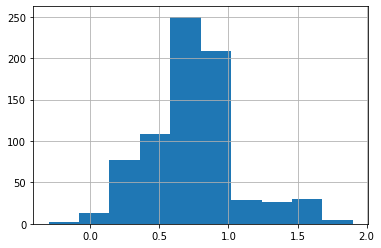

In [14]:
# original target value distribution
df.OBS_VALUE.hist()

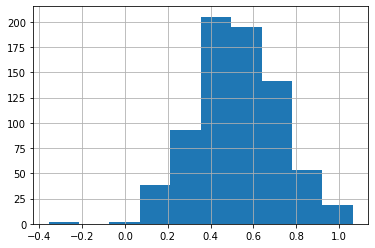

In [15]:
# log transformed target value distribution for non skewed version
np.log1p(df.OBS_VALUE).hist()

In [30]:
#for index, row in df.iterrows():
    #word_freq = []
    #env_words = ["environment", "climate"]
    #for word in env_words:
        #if word in row["Speech"]:
            #counter = 0
            #counter += 1
            #word_freq.append(counter)
            #print(word, index)

environment 1
environment 2
environment 3
climate 3
environment 4
environment 5
climate 6
environment 9
climate 9
environment 10
climate 11
climate 12
climate 13
environment 14
climate 14
environment 15
climate 15
environment 16
environment 17
climate 22
climate 23
climate 24
climate 25
environment 26
climate 27
environment 30
environment 31
climate 31
environment 32
environment 34
environment 35
climate 35
environment 37
environment 38
climate 39
environment 40
climate 40
environment 41
climate 41
climate 42
environment 44
climate 46
climate 47
environment 48
environment 49
climate 49
environment 50
climate 50
environment 51
climate 51
environment 52
environment 53
climate 55
environment 57
climate 57
environment 58
environment 60
environment 62
environment 64
climate 64
environment 65
climate 65
environment 66
climate 66
environment 67
climate 67
environment 68
climate 68
environment 69
environment 70
climate 70
environment 71
climate 71
environment 72
climate 72
environment 74
clima

climate 528
environment 529
climate 529
climate 530
environment 531
climate 531
climate 533
climate 534
environment 535
climate 535
climate 537
environment 538
climate 538
environment 539
environment 540
environment 541
climate 541
environment 542
environment 544
environment 545
environment 547
environment 548
environment 549
climate 550
climate 553
climate 555
environment 556
climate 556
climate 558
environment 559
climate 559
environment 560
climate 561
climate 562
climate 563
environment 564
climate 564
environment 565
climate 565
climate 566
environment 567
environment 568
climate 568
environment 569
environment 570
climate 570
environment 571
environment 572
environment 574
environment 575
environment 576
climate 576
environment 578
climate 579
climate 580
climate 581
environment 582
climate 582
climate 583
climate 585
climate 586
climate 587
climate 588
environment 589
climate 589
environment 590
climate 590
climate 591
environment 592
climate 592
environment 593
environment 595
